<a href="https://colab.research.google.com/github/hirajya/Handling-Imbalance-dataset/blob/main/Logistic_Regression_%7C_Handling_Imbalance_dataset_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression: using Handling imbalance dataset techniques

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
path = '/content/drive/MyDrive/datasets/Telco-Customer-Churn_Cleaned.csv'

df = pd.read_csv(path)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


def model_lr(X, y, strat=False):
  if strat == True:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
  else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


  model = LogisticRegression()

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  print(classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(10, 7))
  sns.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Truth')

  return model







## Sample; Control model

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



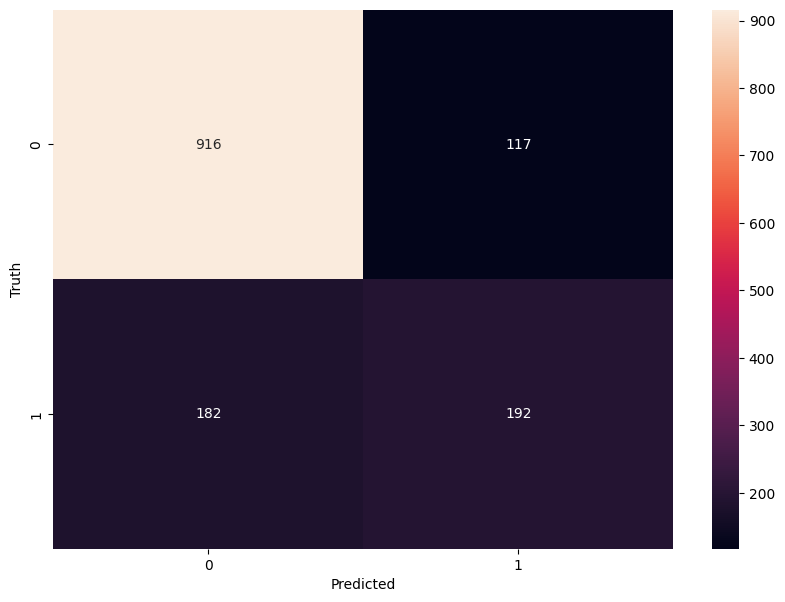

In [ ]:
X = df.drop('Churn', axis=1)
y = df.Churn

model_sample = model_lr(X, y)

In [ ]:
df.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
count_class_0, count_class_1 = df.Churn.value_counts()

df_class_0 = df[df['Churn'] == 0]
df_class_1 = df[df['Churn'] == 1]

In [ ]:
count_class_0, count_class_1

(5163, 1869)

In [ ]:
df_class_0.shape

(5163, 27)

In [ ]:
df_class_1.shape

(1869, 27)

### Method 1: Undersampling

the minority has only 1869, rows. So we are going to undersample the majority to 1869 only.

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

In [ ]:
df_test_under

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6943,0,0,0,0,0.197183,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
798,1,1,1,0,0.971831,1,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
953,1,0,1,1,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
6403,1,0,1,1,1.000000,1,0,1,1,1,...,0,1,0,0,0,1,1,0,0,0
156,1,0,0,0,0.295775,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7010,0,0,0,0,0.154930,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
7015,1,0,0,0,0.112676,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
7021,0,1,0,0,0.000000,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
7023,1,0,0,0,0.929577,1,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0


In [ ]:
df_test_under.shape

(3738, 27)

In [ ]:
df_test_under.Churn.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [ ]:
X = df_test_under.drop('Churn', axis=1)
y = df_test_under['Churn']

              precision    recall  f1-score   support

           0       0.74      0.68      0.71       374
           1       0.71      0.76      0.73       374

    accuracy                           0.72       748
   macro avg       0.72      0.72      0.72       748
weighted avg       0.72      0.72      0.72       748



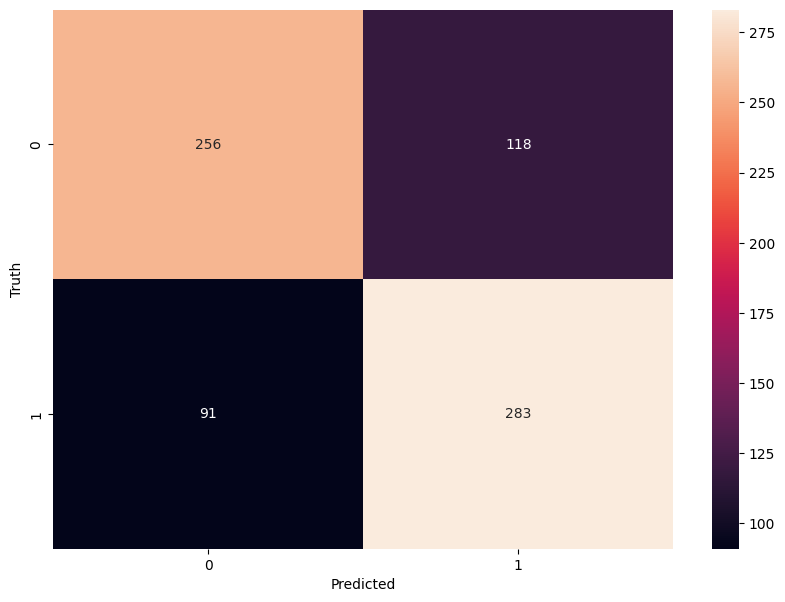

In [ ]:
model_m1 = model_lr(X, y, True)

### Method 2: Oversampling

the majority sampling has 5163 rows. we will leverage the minority sampling by means of duplicating

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True) # gives duplication if value is less than perceived

In [ ]:
df_test_over = pd.concat([df_class_1_over, df_class_0], axis=0)
df_test_over.shape

(10326, 27)

In [ ]:
df_test_over.Churn.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [ ]:
X = df_test_over.drop('Churn', axis=1)
y = df_test_over['Churn']

              precision    recall  f1-score   support

           0       0.78      0.71      0.74      1033
           1       0.73      0.80      0.76      1033

    accuracy                           0.75      2066
   macro avg       0.75      0.75      0.75      2066
weighted avg       0.75      0.75      0.75      2066



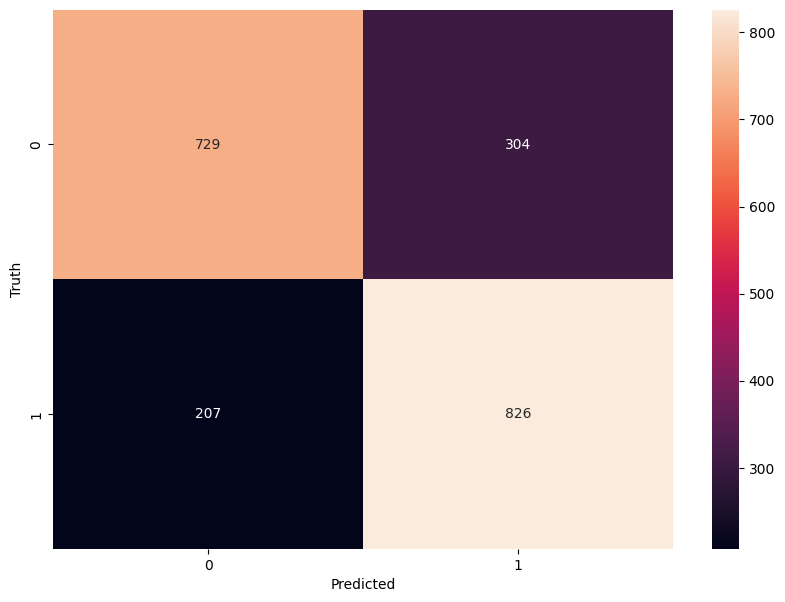

In [ ]:
model_m2 = model_lr(X, y, True)

### Method 3: SMOTE
gaining data through the means of kmeans or svm? of the rationale data

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [ ]:
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.82      0.75      0.79      1033
           1       0.77      0.84      0.80      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.79      2066
weighted avg       0.80      0.80      0.79      2066



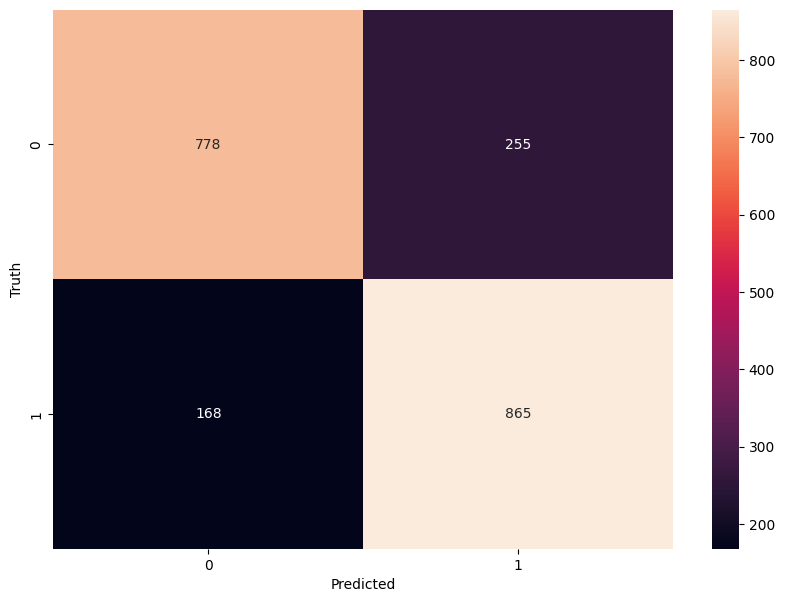

In [ ]:
model_m3 = model_lr(X_sm, y_sm, True)

### Method 4: Ensemble Learning with Undersampling
Batching the training data in respect to the minority data. feeding it to each model. at last, majority voting for models to gain the final answer

In [ ]:
def model_lr(X_train, y_train, X_test, y_test):

  model = LogisticRegression()

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  print(classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(10, 7))
  sns.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Truth')

  return y_pred

In [ ]:
def get_train_batch(df_majority, df_minority, start, end):
  df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

  X_train = df_train.drop('Churn', axis=1)
  y_train = df_train.Churn

  return X_train, y_train

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [ ]:
df2 = X_train.copy()
df2['Churn'] = y_train

In [ ]:
df2_class_0 = df2[df2.Churn==0]
df2_class_1 = df2[df2.Churn==1]

In [ ]:
df2_class_0.shape, df2_class_1.shape

((4130, 27), (1495, 27))

In [ ]:
X_train, y_train = get_train_batch(df2_class_0, df2_class_1, 0, 1495)

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1033
           1       0.52      0.79      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407



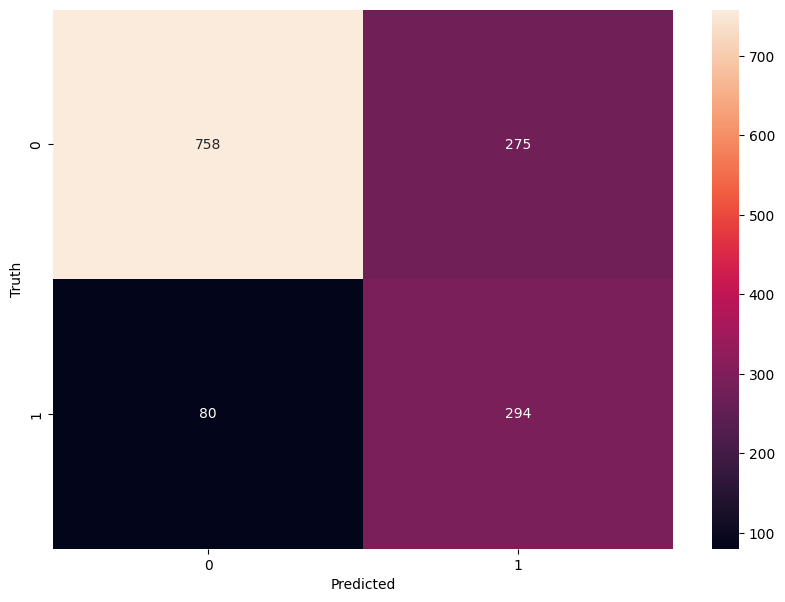

In [ ]:
model_m4_1 = model_lr(X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1033
           1       0.50      0.79      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407



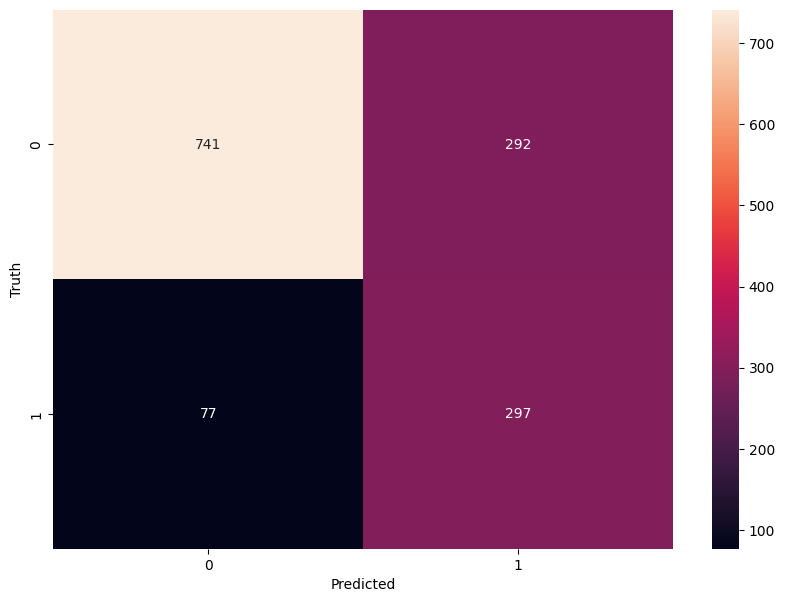

In [ ]:
X_train, y_train = get_train_batch(df2_class_0, df2_class_1, 1495, 2990)
model_m4_2 = model_lr(X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.92      0.65      0.76      1033
           1       0.46      0.84      0.59       374

    accuracy                           0.70      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.80      0.70      0.71      1407



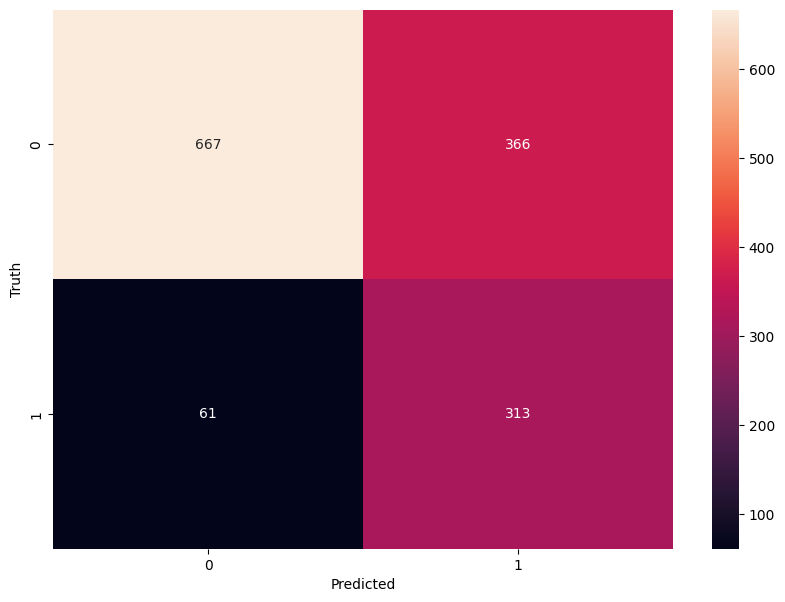

In [ ]:
X_train, y_train = get_train_batch(df2_class_0, df2_class_1, 2990, 4130)
model_m4_3 = model_lr(X_train, y_train, X_test, y_test)

In [ ]:
print(len(model_m4_1))
print(len(model_m4_2))
print(len(model_m4_3))

1407
1407
1407


In [ ]:
y_pred_final = model_m4_1.copy()

for i in range(len(model_m4_1)):
  n_ones = model_m4_1[i] + model_m4_2[i] + model_m4_3[i]

  if n_ones > 1:
    y_pred_final[i] = 1
  else:
    y_pred_final[i] = 0

In [ ]:
y_pred_final

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1033
           1       0.50      0.80      0.62       374

    accuracy                           0.73      1407
   macro avg       0.70      0.76      0.71      1407
weighted avg       0.80      0.73      0.75      1407

